# Illustration of Latin Hypercube vs. Pseudo-Random Sampling

show the difference of Latin Hyper. sampling compared to pseudo-random sampling on $[0,1]^2$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skopt.sampler import Lhs, Sobol
from skopt.space import Space

## Define Methods

In [2]:
def lhs_sampling(n_samples: int, dim: int = 1, low:float = 0., 
                        high:float = 1.) -> np.array:
    """Sample dim-times in [low, high] using Latin Hypercube sampling schema. 
    
    :param n_samples: number of samples to draw 
    :param dim: dimensions in which to sample
    :param low: lower end of sample space
    :param high: upper end of sample space 
    :returns: (n_samples, dim) array of samples 
    """
    sample_space = dim * [(low, high)]
    space = Space(sample_space)

    # init LH sampler and draw samples 
    lhs = Lhs(lhs_type="classic", criterion=None)
    x = lhs.generate(space.dimensions, n_samples)
    x = np.array(x)
    
    assert x.shape == (n_samples,dim), f"Got {x.shape} vs. {(n_samples,dim)}"

    return x


def sobol_sampling(n_samples: int, dim: int = 1, low:float = 0., 
                        high:float = 1.) -> np.array:
    """Sample dim-times in [low, high] using Sobol sampling schema. 
    
    :param n_samples: number of samples to draw 
    :param dim: dimensions in which to sample
    :param low: lower end of sample space
    :param high: upper end of sample space 
    :returns: (n_samples, dim) array of samples 
    """
    sample_space = dim * [(low, high)]
    space = Space(sample_space)

    # init Sobol sampler and draw samples 
    sobol_sampler = Sobol()
    x = sobol_sampler.generate(space.dimensions, n_samples)
    x = np.array(x)
    
    assert x.shape == (n_samples,dim), f"Got {x.shape} vs. {(n_samples,dim)}"

    return x


def pseudo_random_sampling(n_samples: int, dim: int = 1, 
                            low: float = 0., high: float = 1.) -> np.array:
    """Sample dim-times uniformly in [low, high].
    
    :param n_samples: number of samples to draw 
    :param dim: dimensions in which to sample
    :param low: lower end of sample space
    :param high: upper end of sample space 
    :returns: (n_samples, dim) array of samples
    """
    # sample
    x = low + (high - low) * np.random.rand(n_samples, dim)
    
    assert x.shape == (n_samples,dim), f"Got {x.shape} vs. {(n_samples,dim)}"

    return x

## Run Experiments and Plot

In [3]:
N = 300
d = 2

In [4]:
samples_pseudo_random = pseudo_random_sampling(n_samples=N, dim=d)
samples_latin_hypercube = lhs_sampling(n_samples=N, dim=d)
samples_sobol = sobol_sampling(n_samples=N, dim=d)

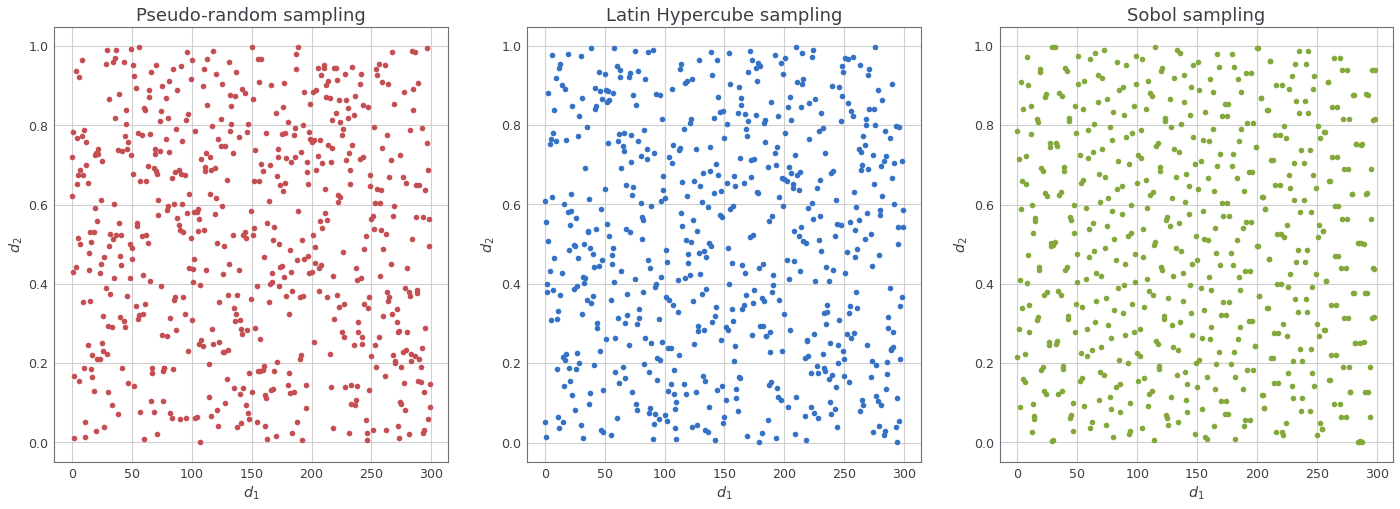

In [5]:
fig = plt.figure(figsize=(24, 8))

ax1 = fig.add_subplot(131)
ax1.plot(samples_pseudo_random, "ro")
ax1.set_title("Pseudo-random sampling", fontsize=18)
ax1.set_xlabel("$d_1$")
ax1.set_ylabel("$d_2$")

ax2 = fig.add_subplot(132)
ax2.plot(samples_latin_hypercube, "bo")
ax2.set_title("Latin Hypercube sampling", fontsize=18)
ax2.set_xlabel("$d_1$")
ax2.set_ylabel("$d_2$")

ax3 = fig.add_subplot(133)
ax3.plot(samples_sobol, "go")
ax3.set_title("Sobol sampling", fontsize=18)
ax3.set_xlabel("$d_1$")
ax3.set_ylabel("$d_2$")

plt.savefig("./outputs/different_sampling_schemas.png", dpi=300, bbox_inches="tight")

plt.show();